In [1]:
import os
os.chdir('..')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15.0, 7.0)
sns.set(style="ticks")

In [2]:
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (15.0, 7.0)

In [3]:
%load_ext autoreload

In [4]:
from com.loan import Loan
from com.investor import Investor
from com.backtest import Backtest

In [5]:
from com.lc_helpers import (get_cache_historic)

In [6]:
input_db = get_cache_historic()
# db = get_db_folder()
# training = pd.read_csv(db['training']).pipe(make_df_numeric, fix_nans=True)
# testing = pd.read_csv(db['testing']).pipe(make_df_numeric, fix_nans=True)
# testing2 = pd.read_csv(db['testing2']).pipe(make_df_numeric, fix_nans=True)
# testing3 = pd.read_csv(db['testing3']).pipe(make_df_numeric, fix_nans=True)
# input_db = pd.read_csv(db['complete_fixed']).pipe(make_df_numeric, fix_nans=True)

cache file


In [7]:
# input_db = pd.concat([training, testing, testing2, testing3])

In [8]:
dates = sorted(input_db['issue_d'].unique())
dates[0], dates[-1]

(Period('2007-06', 'M'), Period('2015-12', 'M'))

In [9]:
from com.backtest import generic_buy_solver, initial_buy_solver

In [10]:
%autoreload Backtest
model_db = input_db[input_db['grade'].isin(['F','G'])]
bt = Backtest(dates[12], dates[-1], _buy_solver, model_db, cash=1000, liquidity_limit=1.0)

In [11]:
result = bt.run()

2008-06 2015-12
available  0
solver number  40.0
solver number restricted  0
2008-07 2015-12
available  0
solver number  40.0
solver number restricted  0
2008-08 2015-12
available  3
solver number  40.0
solver number restricted  3
2008-09 2015-12
available  1
solver number  37.0
solver number restricted  1
2008-10 2015-12
available  0
solver number  36.0
solver number restricted  0
2008-11 2015-12
available  2
solver number  36.0
solver number restricted  2
2008-12 2015-12
available  3
solver number  34.0
solver number restricted  3
2009-01 2015-12
available  2
solver number  31.0
solver number restricted  2
2009-02 2015-12
available  3
solver number  30.0
solver number restricted  3
2009-03 2015-12
available  3
solver number  28.0
solver number restricted  3
2009-04 2015-12
available  4
solver number  26.0
solver number restricted  4
2009-05 2015-12
available  5
solver number  23.0
solver number restricted  5
2009-06 2015-12
available  6
solver number  20.0
solver number restricted  6

com/backtest.py:162: FutureWarning: slice indexers when using iloc should be integers and not floating point
  'loans': month_db.iloc[0:number],


In [12]:
bt.stats_dict['sharpe']

1.6685149747266976

In [17]:
# bt.stats.tail(10)

In [18]:
bt.stats.columns

Index([u'abs imbalance', u'abs imbalance %', u'available loans', u'cash held',
       u'cumulative defaults', u'cumulative loans held', u'imbalance',
       u'imbalance %', u'loans added', u'loans held', u'net worth',
       u'strategy available loans', u'defaults', u'monthly return',
       u'annualized return', u'realized liquidity',
       u'realized vs strategy liquidity', u'strategy liquidity',
       u'default rate', u'growth of $1'],
      dtype='object')

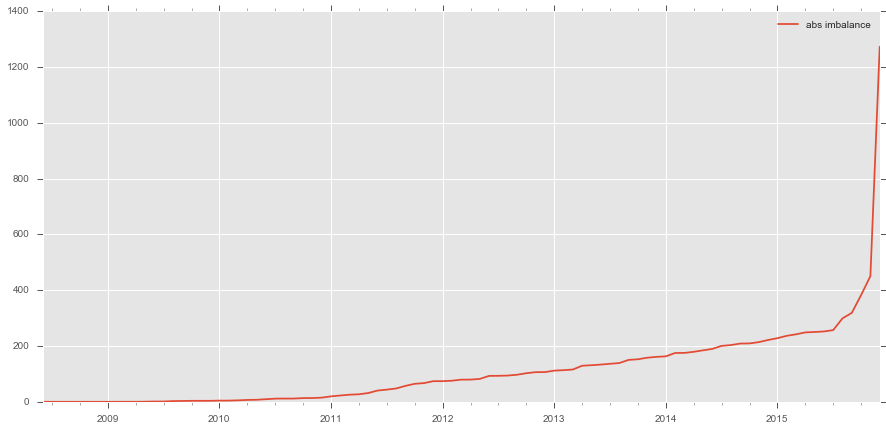

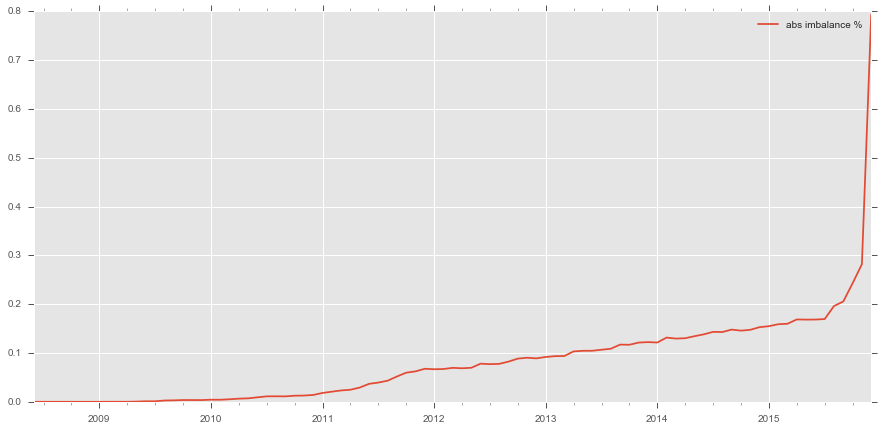

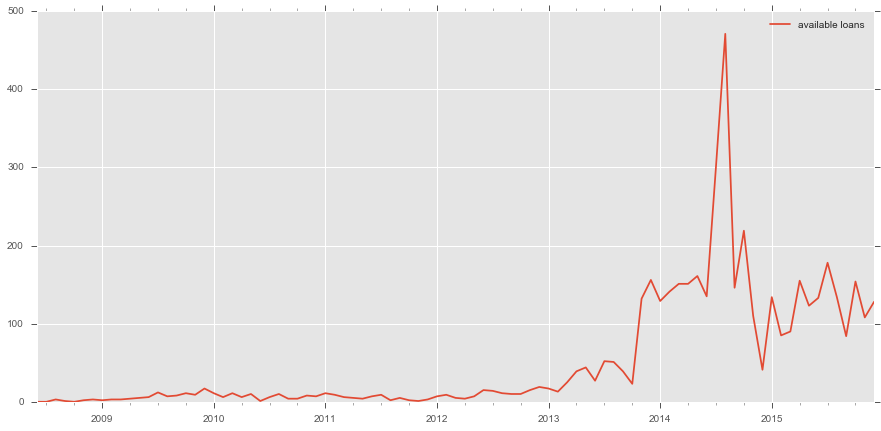

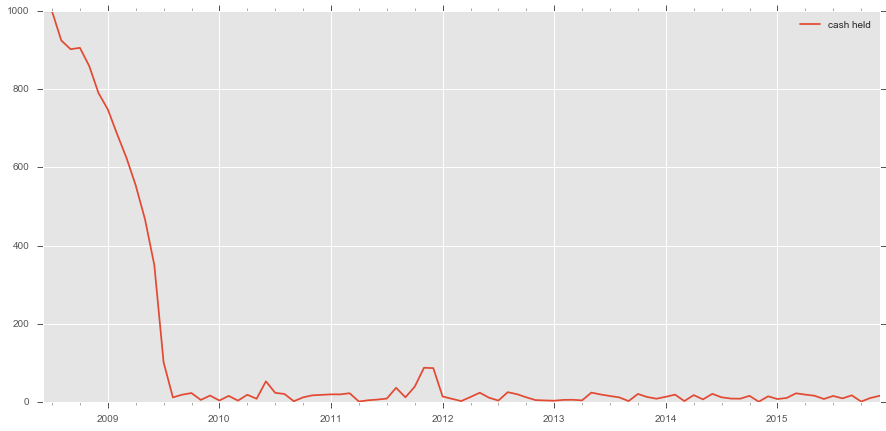

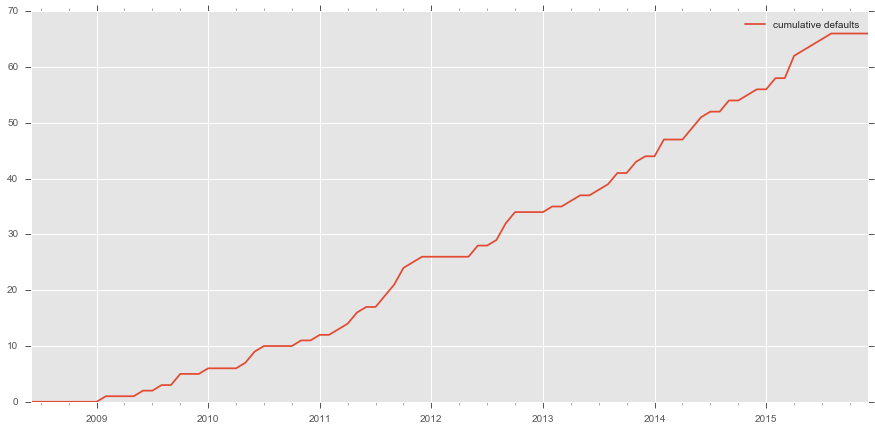

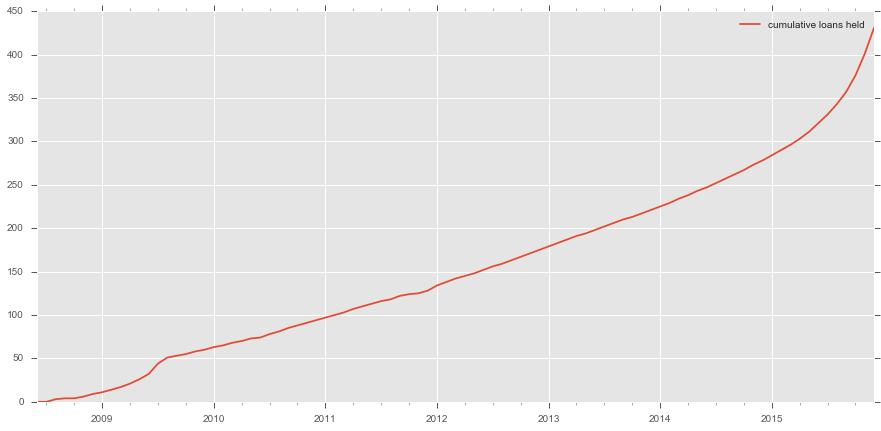

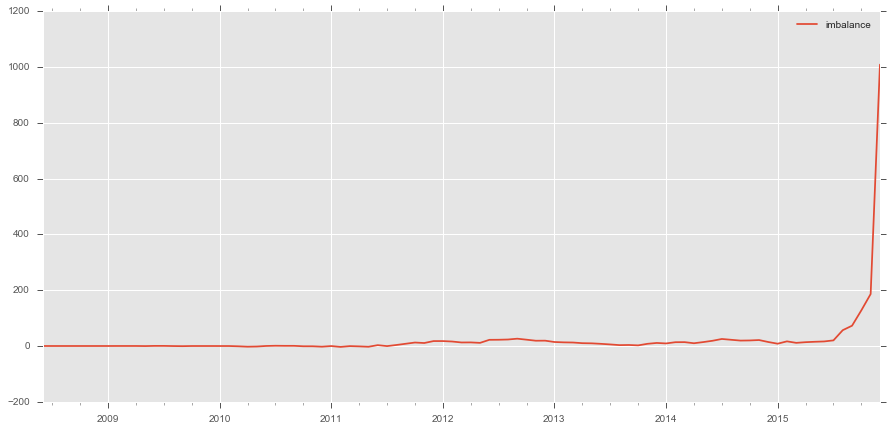

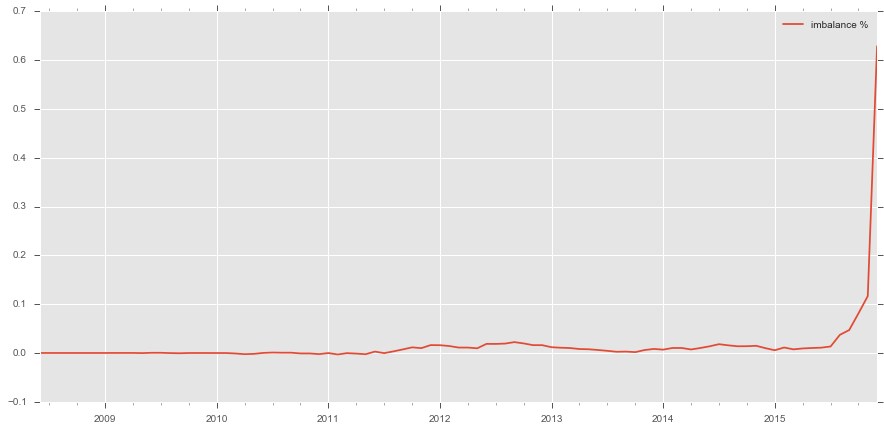

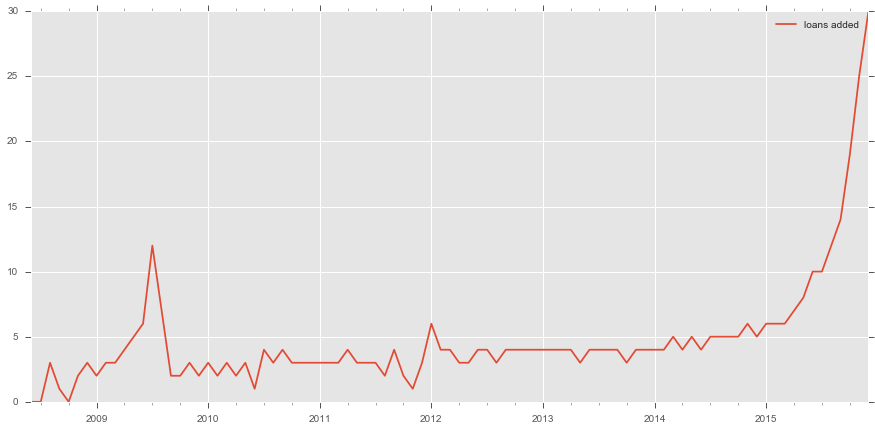

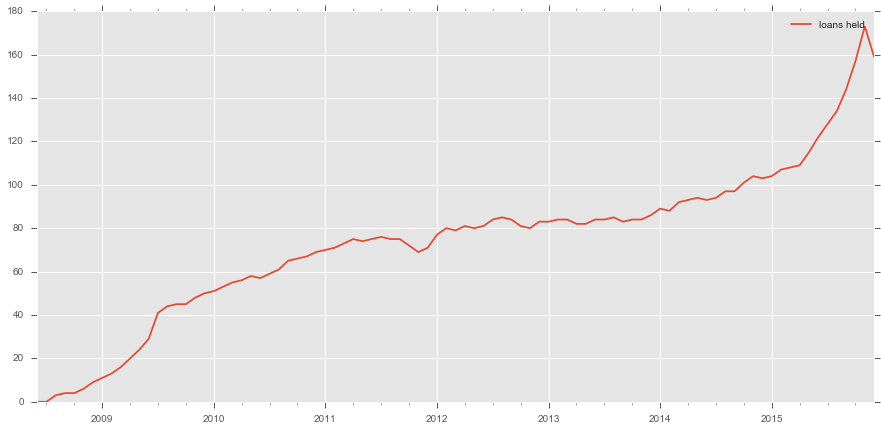

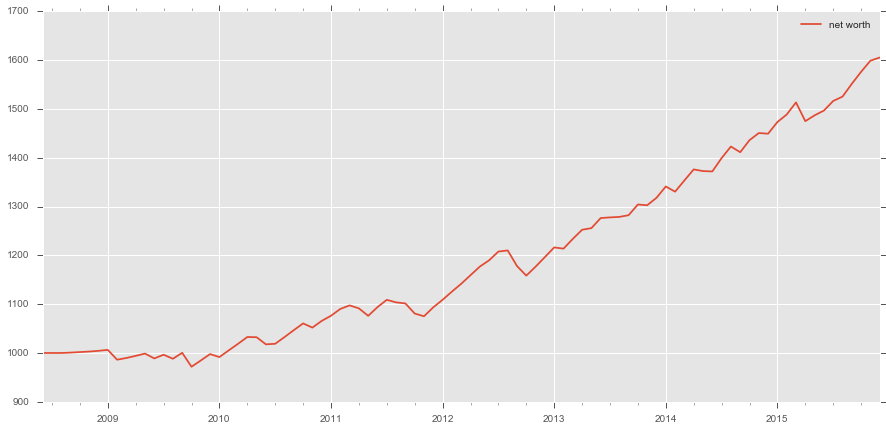

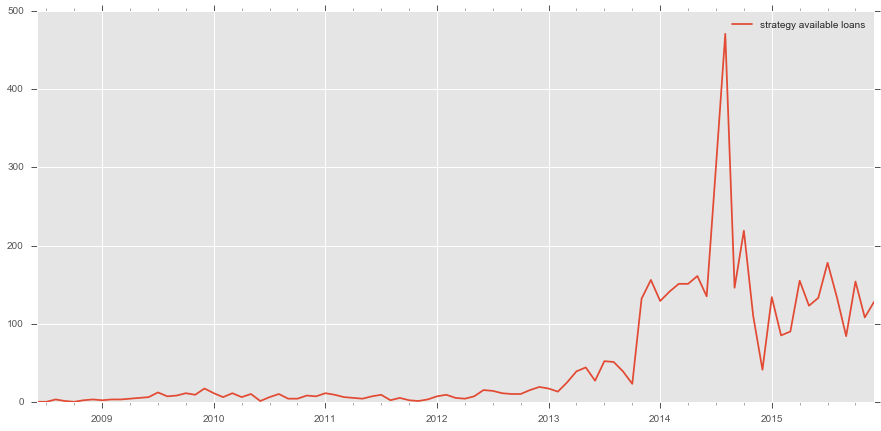

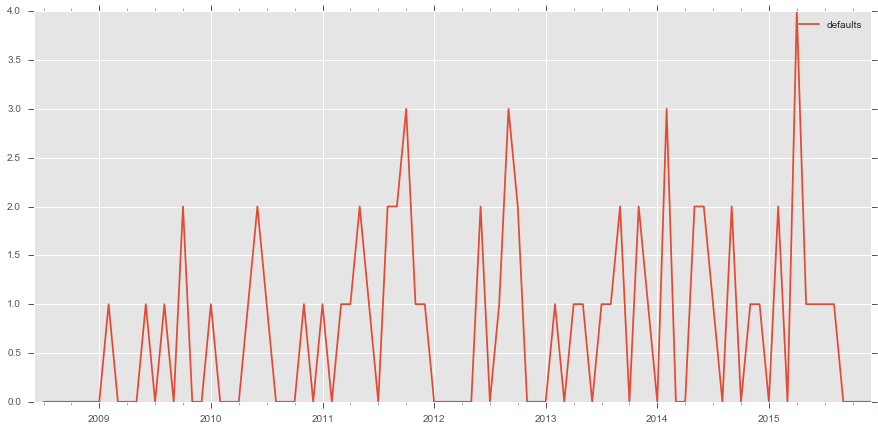

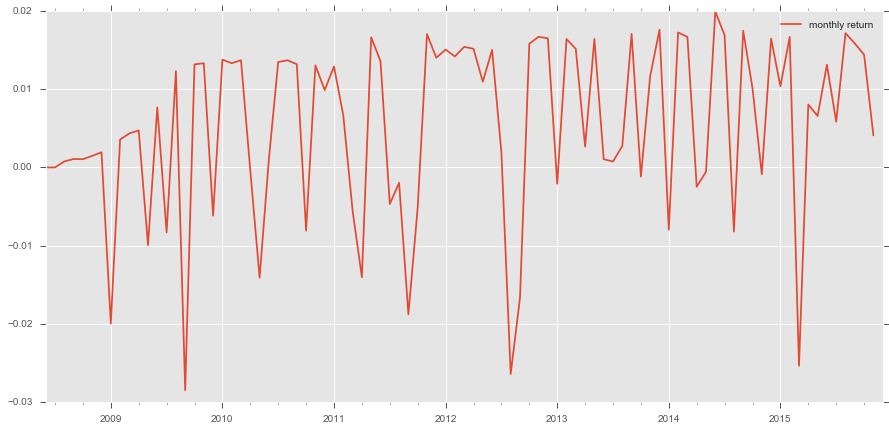

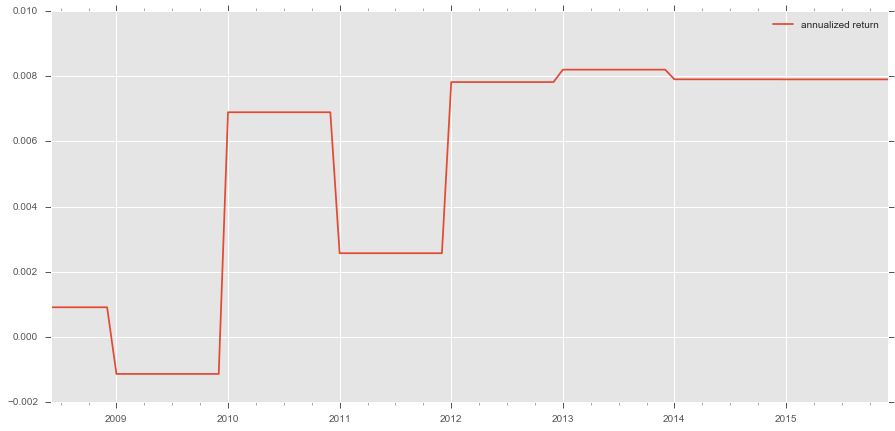

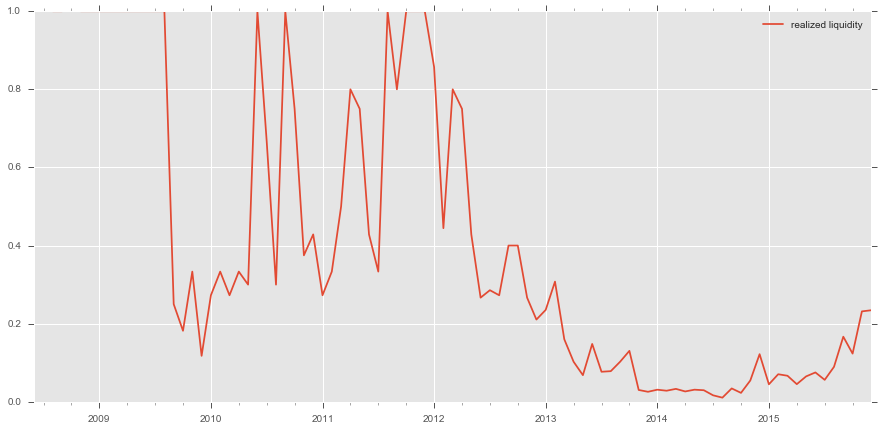

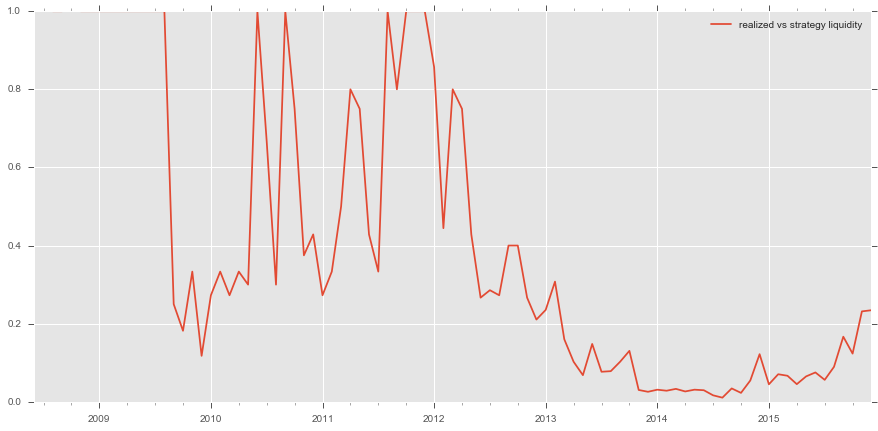

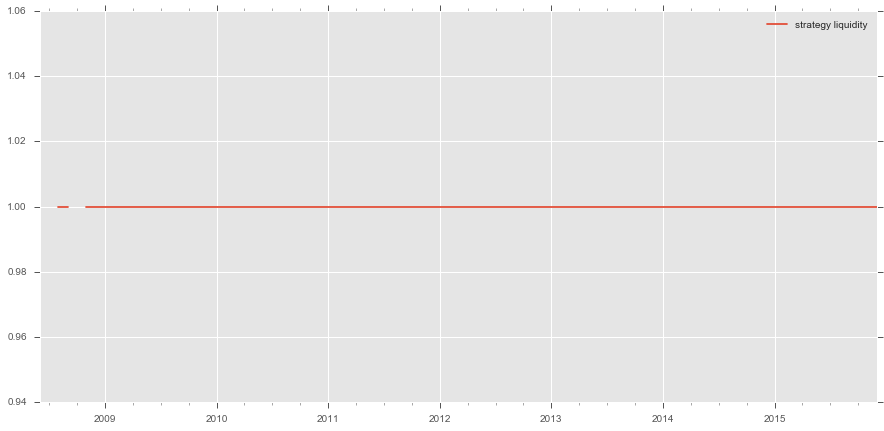

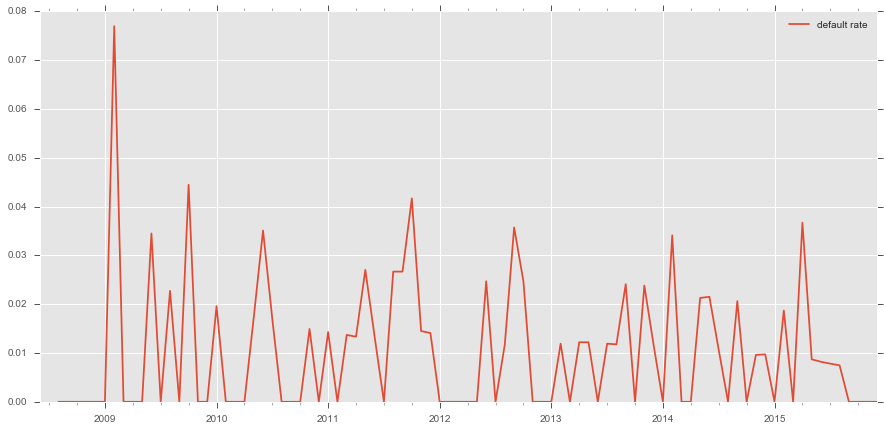

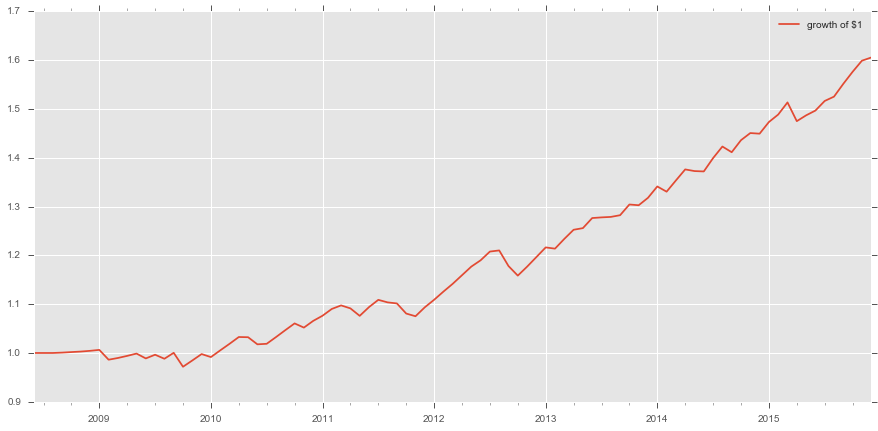

In [43]:
for column in bt.stats.columns:
    bt.stats[column].plot(label=column)
    plt.legend()
    plt.show()

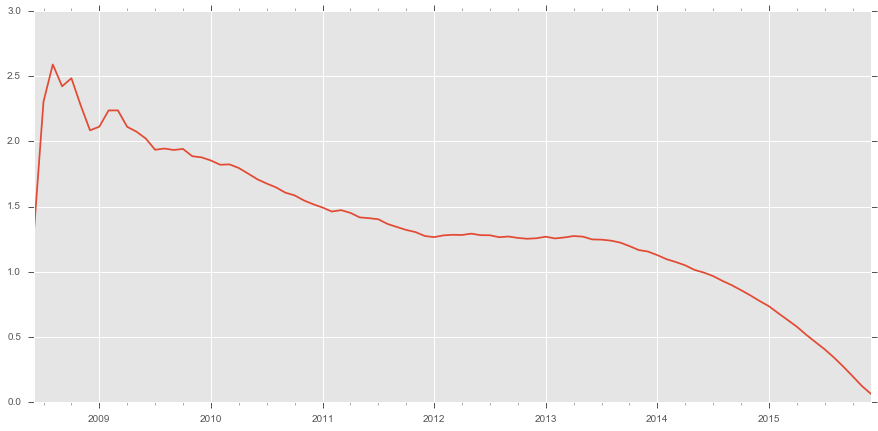

In [36]:
bt.loan_stats['duration'].mean(axis=1).plot()

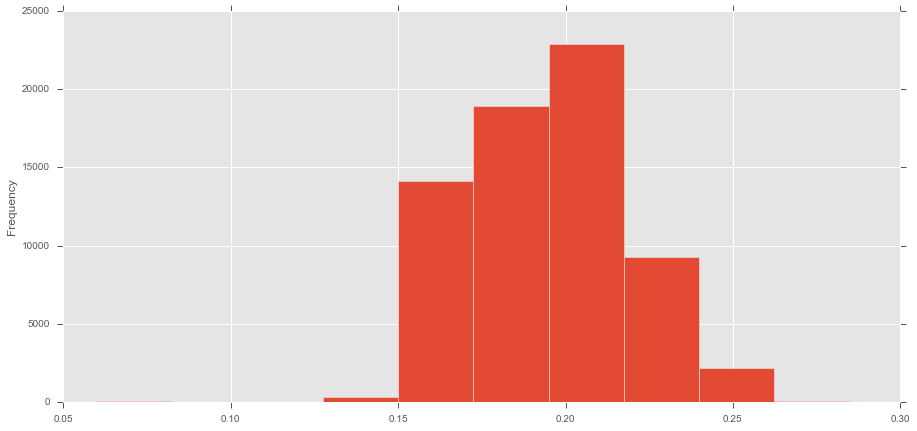

In [39]:
bt.loan_stats_total['int_rate'].plot.hist()

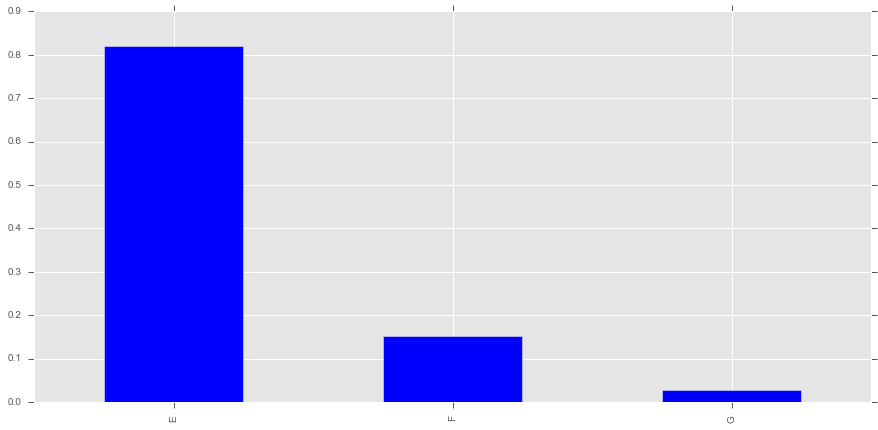

In [22]:
(bt.loan_stats_total['grade'] / bt.loan_stats_total['grade'].sum()).plot.bar()